In [42]:
import plotting
import numpy as np
import matplotlib.pyplot as plt
import h5py
import importlib
importlib.reload(plotting)

<module 'plotting' from '/home/herogers/SingleCube/ndlar_39Ar_reco/charge_reco/plotting.py'>

In [24]:
filepath = '/mount/sda1/SingleCube_Dec2023/cluster_data/datalog_2020_10_28_09_41_08_CET__clusters.h5'
f = h5py.File(filepath, 'r')
clusters = f['clusters']

In [33]:
rate_threshold=0.01
clusters_cut = np.copy(clusters)
single_hit_clusters = clusters[clusters['nhit'] == 1]
combined_dstack = np.dstack((single_hit_clusters['x_mid'], single_hit_clusters['y_mid'], \
                             single_hit_clusters['z_anode']))[0]

from collections import Counter
runtime_seconds = abs(np.max(single_hit_clusters['unix']) - np.min(single_hit_clusters['unix']))
# count occurrences of each unique tuple of x,y, and z
count_dict = Counter([tuple(row) for row in combined_dstack])
tuples_to_remove = np.array(list(count_dict.keys()))[np.array(list(count_dict.values()))/(runtime_seconds) > rate_threshold]
print(f'File runtime = {(runtime_seconds/60):.3f} minutes')
print(f'{len(tuples_to_remove)} channels disabled.')
print(f'{(100*len(tuples_to_remove)/len(list(count_dict.keys()))):.4f} percentage of channels disabled.')

print('Removing clusters from noisy channels...')
# remove 1-hit clusters that come from channel to remove
for key in tuples_to_remove:
    mask = (single_hit_clusters['x_mid'] == key[0]) & (single_hit_clusters['y_mid'] == key[1]) \
            & (single_hit_clusters['z_anode'] == key[2])
    clusters_cut = clusters_cut[~np.isin(clusters_cut['id'], single_hit_clusters[mask]['id'])]
# clear memory before moving on
combined_dstack=0
single_hit_clusters=0
mask=0
count_dict=0

File runtime = 29.317 minutes
235 channels disabled.
5.5503 percentage of channels disabled.
Removing clusters from noisy channels...


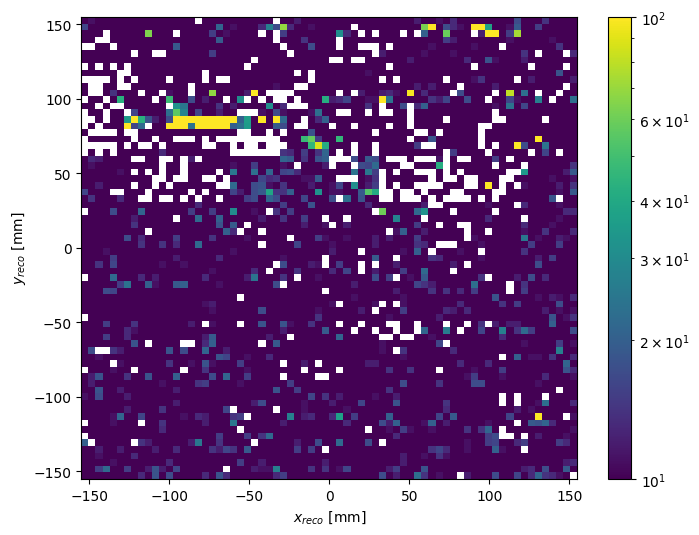

In [34]:
plotting.XY_Hist2D(clusters_cut, use_z_cut=False, vmin=10, vmax=1e2, isSingleCube=True)

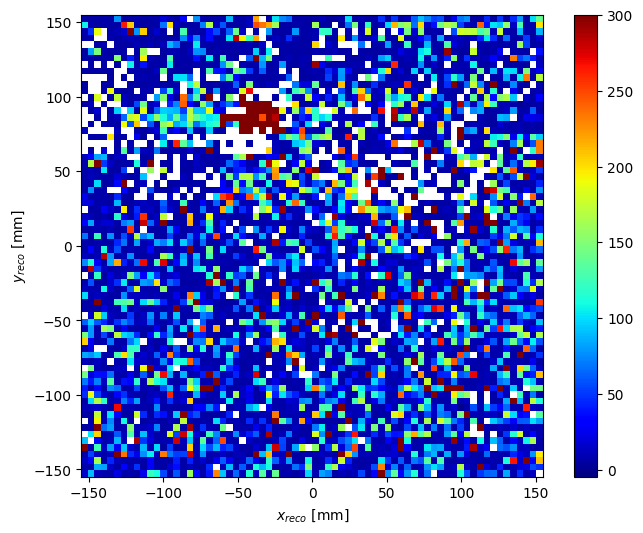

In [45]:
plotting.plot_2D_statistic(clusters_cut, clusters_cut['q']*221*1e-3, stat='mean', plot_type='xy', log_scale=False, isSingleCube=True, vmax=300)

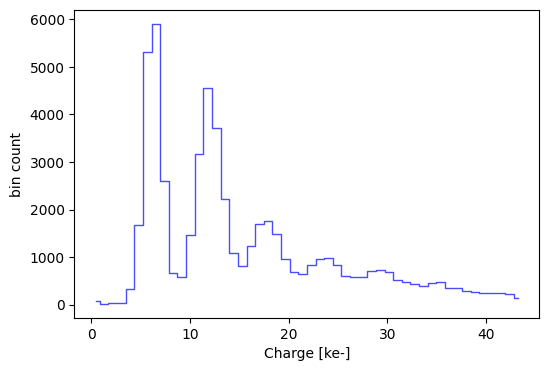

In [38]:
plotting.plotRecoSpectrum(clusters_cut, nbins=50, useYlog=False)

In [3]:
clusters

<HDF5 dataset "clusters": shape (4125,), type "|V144">

In [ ]:
# multiple files
importlib.reload(plotting)
folder = '/global/cfs/cdirs/dune/users/sfogarty/Module0_reco/39Ar_reco/'
filenames = ['cluster_selection_module-2_2022_11_20_19_36_CET.h5', \
            'cluster_selection_module-2_2022_11_20_19_56_CET.h5', \
            'cluster_selection_module-2_2022_11_20_20_16_CET.h5', \
            'cluster_selection_module-2_2022_11_20_20_36_CET.h5', \
            'cluster_selection_module-2_2022_11_20_20_56_CET.h5', \
            'cluster_selection_module-2_2022_11_20_21_16_CET.h5', \
            'cluster_selection_module-2_2022_11_20_21_36_CET.h5', \
            'cluster_selection_module-2_2022_11_20_21_56_CET.h5', \
            'cluster_selection_module-2_2022_11_20_22_16_CET.h5']
filenames = ['datalog_2021_04_04_09_38_27_CEST_clusters.h5']
all_clusters = 0
for i, filename in enumerate(filenames):
    f = h5py.File(folder+filename, 'r')
    if i == 0:
        all_clusters = np.array(f['clusters'])
    else:
        all_clusters = np.concatenate((all_clusters, np.array(f['clusters'])))
    f.close()
#plotting.XZ_Hist2D(all_clusters, vmax=1e1)
#plotting.XY_Hist2D(all_clusters)
plotting.plotRecoSpectrum(all_clusters, nbins=200, useYlog=False, calibrate=True, bin_start=0)